**简体中文版 ELMo**

**在google colab中将python版本降至3.7**

在一切之前，将 pythonpath 设置为空，这样就不会发生冲突。

In [1]:
%env PYTHONPATH = # /env/python

env: PYTHONPATH=# /env/python


首先，你得到 miniconda （我使用的是 python 3.8 版本的 miniconda，但你可以更改它）。您必须保留路径“/usr/local”才能使其正常工作。否则colab将无法识别conda。

In [2]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
# !wget https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-py38_4.12.0-Linux-x86_64.sh
!/content/Miniconda3-py38_4.12.0-Linux-x86_64.sh -b -f -p /usr/local
!conda update conda

--2023-09-21 23:55:19--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76120962 (73M) [application/x-sh]
Saving to: ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’

Miniconda3-py38_4.1 100%[===================>]  72.59M  55.0MB/s    in 1.3s    

2023-09-21 23:55:20 (55.0 MB/s) - ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’ saved [76120962/76120962]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py38h06a4308_2
    - cffi==1.15.0=py38hd667e15_1

然后，附加此路径来安装包。

In [3]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

check conda install

In [4]:
!ls -al /usr/local/bin | grep python*

-rwxr-xr-x 1 root root      224 Sep 20 13:36 ipython
-rwxr-xr-x 1 root root      224 Sep 20 13:36 ipython3
lrwxrwxrwx 1 root root        9 Sep 21 23:56 python -> python3.8
lrwxrwxrwx 1 root root        9 Sep 21 23:56 python3 -> python3.8
-rwxrwxr-x 1 root root 15164208 Sep 21 23:56 python3.8
-rwxrwxr-x 1 root root     3443 Sep 21 23:56 python3.8-config
lrwxrwxrwx 1 root root       16 Sep 21 23:56 python3-config -> python3.8-config


In [5]:
!conda info | grep -i 'base environment'

print()
!ls -al /usr/local/etc/profile.d

       base environment : /usr/local  (writable)

total 16
drwxr-xr-x 2 root root 4096 Sep 21 23:55 .
drwxr-xr-x 1 root root 4096 Sep 21 23:55 ..
-rw-rw-r-- 1 root root 2465 Sep 21 23:55 conda.csh
-rw-rw-r-- 1 root root 2780 Sep 21 23:55 conda.sh


In [6]:
!python --version

Python 3.8.18


使用与 AllenNLP 2.5.0 匹配的 python(3.7) 版本创建虚拟环境

In [7]:
!conda create -n nlp python=3.7

Solving environment: \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/nlp

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    pip-22.3.1                 |   py37h06a4308_0         2.7 MB
    python-3.7.16              |       h7a1cb2a_0        44.8 MB
    setuptools-65.6.3          |   py37h06a4308_0         1.1 MB
    wheel-0.38.4               |   py37h06a4308_0          63 KB
   

### 安装 AllenNLP 2.5.0
**注意：编辑运行脚本中，命令前面不能使用 ！或 % ... ...**

In [8]:
%%shell
eval "$(conda shell.bash hook)"
conda activate nlp

pip install --upgrade pip
pip install --upgrade setuptools

pip list | grep pip*
pip list | grep setuptools*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/c7/42/be1c7bbdd83e1bfb160c94b9cafd8e25efc7400346cf7ccdbdb452c467fa/setuptools-68.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
pip        23.2.1
setuptools 68.0.0


In [9]:
%%shell
eval "$(conda shell.bash hook)"
conda activate nlp

# CUDA 10.2
pip install torch==1.8.1+cu102 torchvision==0.9.1+cu102 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

pip install allennlp==2.5.0
pip install allennlp-models==2.5.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.1/804.1 MB 892.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.4/681.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 70.4 MB/s eta 0:00:00
  Obtaining dependency informat

[bug] You can now load the package via spacy.load('en_core_web_sm')
</br>
Downloading : https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl
</br>
Collecting spacy<3.1, >=2.1.0
  Downloading spacy-3.0.9-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.8 MB)

In [22]:
%%shell
eval "$(conda shell.bash hook)"
conda activate nlp

python -m spacy download en_core_web_sm

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 26.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**克隆ELMoForManyLangs代码**

In [40]:
%cd /content

!git clone https://github.com/HIT-SCIR/ELMoForManyLangs.git

%cd /content/ELMoForManyLangs

/content
Cloning into 'ELMoForManyLangs'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 212 (delta 9), reused 22 (delta 5), pack-reused 174
Receiving objects: 100% (212/212), 125.80 KiB | 3.93 MiB/s, done.
Resolving deltas: 100% (96/96), done.
/content/ELMoForManyLangs


In [41]:
%%shell
eval "$(conda shell.bash hook)"
conda activate nlp

python -m site

sys.path = [
    '/content/ELMoForManyLangs',
    '/content/ELMoForManyLangs/# /env/python',
    '/usr/local/envs/nlp/lib/python37.zip',
    '/usr/local/envs/nlp/lib/python3.7',
    '/usr/local/envs/nlp/lib/python3.7/lib-dynload',
    '/usr/local/envs/nlp/lib/python3.7/site-packages',
    '/usr/local/envs/nlp/lib/python3.7/site-packages/elmoformanylangs-0.0.4.post2-py3.7.egg',
]
USER_BASE: '/root/.local' (exists)
USER_SITE: '/root/.local/lib/python3.7/site-packages' (doesn't exist)
ENABLE_USER_SITE: True


[code] python -m setup.py install
</br></br>
[bug] Error while finding module specification for 'setup.py' (ModuleNotFoundError: __path__ attribute not found on 'setup' while trying to find 'setup.py')
</br></br>
[fixed] python -m setup install

In [42]:
%%shell
eval "$(conda shell.bash hook)"
conda activate nlp

python -m setup install

running install
/usr/local/envs/nlp/lib/python3.7/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/envs/nlp/lib/python3.7/site-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

 

**调用API接口，训练模型（方便跟踪调试代码）**

demo.py

```
from elmoformanylangs import Embedder

e = Embedder('/content/zhs.model')

sents = [['今', '天', '天氣', '真', '好', '阿'],
['潮水', '退', '了', '就', '知道', '誰', '沒', '穿', '褲子']]
# the list of lists which store the sentences
# after segment if necessary.

e.sents2elmo(sents)
# will return a list of numpy arrays
# each with the shape=(seq_len, embedding_size)
print(ch_em)
print()
print(ch_em[0].shape)
```



**zhs.model download address**
---------------------------------------------------------------
http://vectors.nlpl.eu/repository/

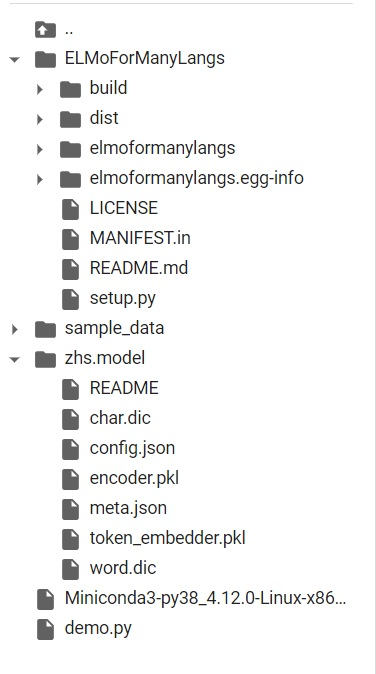

In [43]:
%%shell
eval "$(conda shell.bash hook)"

conda activate nlp

python3 /content/demo.py

2023-09-22 01:29:52,849 WARNING: Could not find config.  Trying /content/zhs.model/cnn_50_100_512_4096_sample.json
2023-09-22 01:29:52,849 WARNING: Could not find config.  Trying /usr/local/envs/nlp/lib/python3.7/site-packages/elmoformanylangs-0.0.4.post2-py3.7.egg/elmoformanylangs/configs/cnn_50_100_512_4096_sample.json
2023-09-22 01:29:52,918 INFO: char embedding size: 15889
2023-09-22 01:29:53,837 INFO: word embedding size: 140384
2023-09-22 01:30:00,737 INFO: Model(
  (token_embedder): ConvTokenEmbedder(
    (word_emb_layer): EmbeddingLayer(
      (embedding): Embedding(140384, 100, padding_idx=3)
    )
    (char_emb_layer): EmbeddingLayer(
      (embedding): Embedding(15889, 50, padding_idx=15886)
    )
    (convolutions): ModuleList(
      (0): Conv1d(50, 32, kernel_size=(1,), stride=(1,))
      (1): Conv1d(50, 32, kernel_size=(2,), stride=(1,))
      (2): Conv1d(50, 64, kernel_size=(3,), stride=(1,))
      (3): Conv1d(50, 128, kernel_size=(4,), stride=(1,))
      (4): Conv1d(50,